In [13]:
# Parodomos pirmos penkios duomeų eilutės
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.datasets import load_iris
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
file_path = "Iris.csv"
df = pd.read_csv(file_path)
df.head()


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


Columns in dataset: Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)', 'Species'],
      dtype='object')
Unique species: ['Setosa' 'Versicolor' 'Virginica']
New class distribution:
 Species
Setosa        50
Virginica     50
Versicolor     5
Name: count, dtype: int64


Text(0.5, 1.0, 'Sumaišties matrica pašalinus 45 Versicolor pavyzdžių (%)')

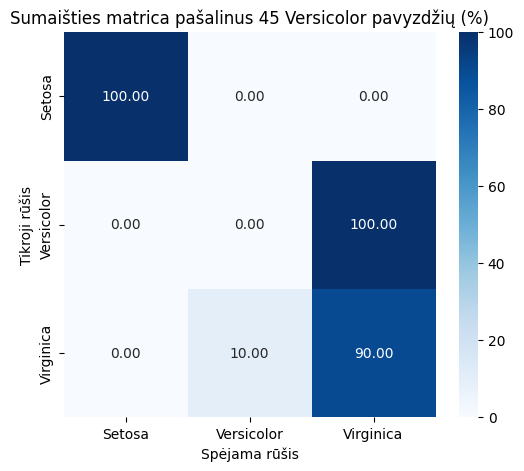

In [14]:
# Sukuriama sumaišties matrica naudojant sumažintą duomeų rinkinį
iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df["Species"] = iris.target

species_names = {0: "Setosa", 1: "Versicolor", 2: "Virginica"}
df["Species"] = df["Species"].map(species_names)

print("Columns in dataset:", df.columns)

print("Unique species:", df["Species"].unique())

setosa_indices = df[df["Species"] == "Setosa"].index[:50]
versicolor_indices = df[df["Species"] == "Versicolor"].index[:5] 
virginica_indices = df[df["Species"] == "Virginica"].index[:50]

imbalanced_df = df.loc[setosa_indices.union(versicolor_indices).union(virginica_indices)].reset_index(drop=True)

print("New class distribution:\n", imbalanced_df["Species"].value_counts())

X_imbalanced = imbalanced_df.drop(columns=["Species"])
y_imbalanced = imbalanced_df["Species"]

encoder = LabelEncoder()
y_imbalanced_encoded = encoder.fit_transform(y_imbalanced)

X_train_imbalanced, X_test_imbalanced, y_train_imbalanced, y_test_imbalanced = train_test_split(
    X_imbalanced, y_imbalanced_encoded, test_size=0.2, random_state=42, stratify=y_imbalanced_encoded
)

scaler = StandardScaler()
X_train_imbalanced_scaled = scaler.fit_transform(X_train_imbalanced)
X_test_imbalanced_scaled = scaler.transform(X_test_imbalanced)

mlp_imbalanced = MLPClassifier(hidden_layer_sizes=(10, 10), max_iter=1000, random_state=42)
mlp_imbalanced.fit(X_train_imbalanced_scaled, y_train_imbalanced)

y_pred_imbalanced = mlp_imbalanced.predict(X_test_imbalanced_scaled)

accuracy_imbalanced = accuracy_score(y_test_imbalanced, y_pred_imbalanced)
classification_rep_imbalanced = classification_report(y_test_imbalanced, y_pred_imbalanced, target_names=encoder.classes_)

cm_imbalanced = confusion_matrix(y_test_imbalanced, y_pred_imbalanced)

plt.figure(figsize=(6, 5))
sns.heatmap(cm_imbalanced / cm_imbalanced.sum(axis=1)[:, np.newaxis] * 100, annot=True, fmt=".2f", cmap="Blues",
            xticklabels=encoder.classes_, yticklabels=encoder.classes_)

plt.xlabel("Spėjama rūšis")
plt.ylabel("Tikroji rūšis")
plt.title("Sumaišties matrica pašalinus 45 Versicolor pavyzdžių (%)")

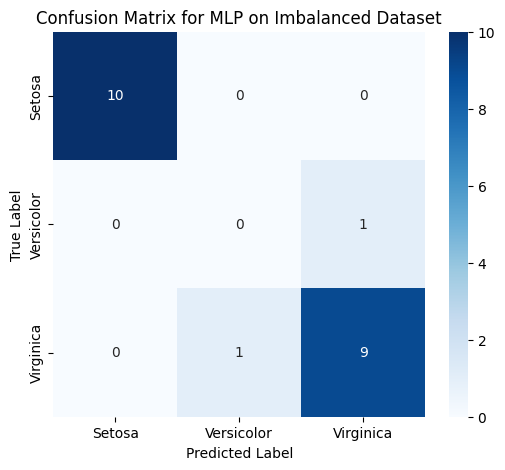

In [15]:
# Pasižiūrima, kiek vienetų ne taip buvo suklasifikuoti
cm = confusion_matrix(y_test_imbalanced, y_pred_imbalanced)

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=encoder.classes_, yticklabels=encoder.classes_)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix for MLP on Imbalanced Dataset")
plt.show()


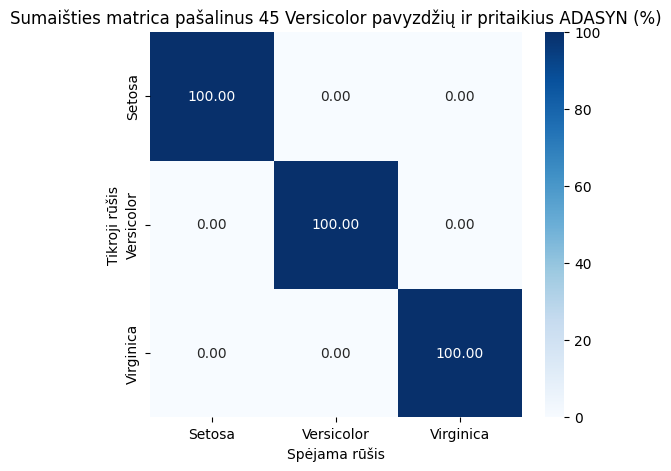

In [16]:
# Pritaikomas ADASYN su duomenų rinkiniu
from imblearn.over_sampling import ADASYN
iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df["Species"] = iris.target

species_names = {0: "Setosa", 1: "Versicolor", 2: "Virginica"}
df["Species"] = df["Species"].map(species_names)

setosa_indices = df[df["Species"] == "Setosa"].index[:50]
versicolor_indices = df[df["Species"] == "Versicolor"].index[:5] 
virginica_indices = df[df["Species"] == "Virginica"].index[:50]

imbalanced_df = df.loc[setosa_indices.union(versicolor_indices).union(virginica_indices)].reset_index(drop=True)

X_imbalanced = imbalanced_df.drop(columns=["Species"])
y_imbalanced = imbalanced_df["Species"]

encoder = LabelEncoder()
y_imbalanced_encoded = encoder.fit_transform(y_imbalanced)

X_train_imbalanced, X_test_imbalanced, y_train_imbalanced, y_test_imbalanced = train_test_split(
    X_imbalanced, y_imbalanced_encoded, test_size=0.2, random_state=42, stratify=y_imbalanced_encoded
)
adasyn = ADASYN(random_state=42, n_neighbors=2)  
X_train_adasyn, y_train_adasyn = adasyn.fit_resample(X_train_imbalanced_scaled, y_train_imbalanced)

mlp_adasyn = MLPClassifier(hidden_layer_sizes=(10, 10), max_iter=1000, random_state=77)
mlp_adasyn.fit(X_train_adasyn, y_train_adasyn)

y_pred_adasyn = mlp_adasyn.predict(X_test_imbalanced_scaled)

conf_matrix_adasyn = confusion_matrix(y_test_imbalanced, y_pred_adasyn)

conf_matrix_adasyn_percent = conf_matrix_adasyn.astype('float') / conf_matrix_adasyn.sum(axis=1)[:, np.newaxis] * 100

plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix_adasyn_percent, annot=True, fmt=".2f", cmap="Blues", xticklabels=encoder.classes_, yticklabels=encoder.classes_)
plt.xlabel("Spėjama rūšis")
plt.ylabel("Tikroji rūšis")
plt.title("Sumaišties matrica pašalinus 45 Versicolor pavyzdžių ir pritaikius ADASYN (%)")
plt.show()


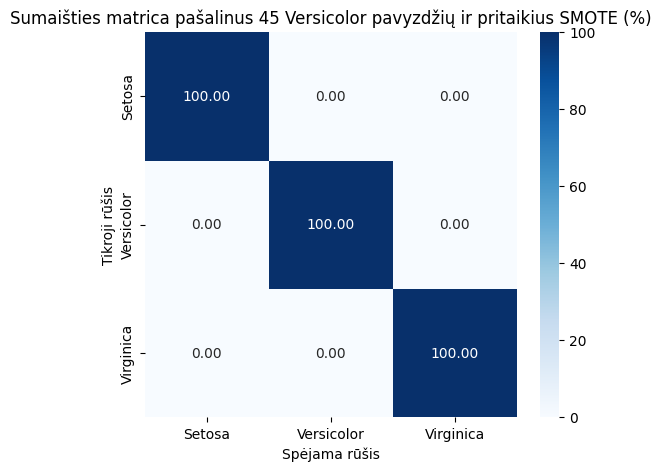

In [17]:
# Pritaikomas SMOTE su duomenų rinkiniu

from imblearn.over_sampling import SMOTE

iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df["Species"] = iris.target

species_names = {0: "Setosa", 1: "Versicolor", 2: "Virginica"}
df["Species"] = df["Species"].map(species_names)

setosa_indices = df[df["Species"] == "Setosa"].index[:50]
versicolor_indices = df[df["Species"] == "Versicolor"].index[:5] 
virginica_indices = df[df["Species"] == "Virginica"].index[:50]

imbalanced_df = df.loc[setosa_indices.union(versicolor_indices).union(virginica_indices)].reset_index(drop=True)

X_imbalanced = imbalanced_df.drop(columns=["Species"])
y_imbalanced = imbalanced_df["Species"]

encoder = LabelEncoder()
y_imbalanced_encoded = encoder.fit_transform(y_imbalanced)

X_train_imbalanced, X_test_imbalanced, y_train_imbalanced, y_test_imbalanced = train_test_split(
    X_imbalanced, y_imbalanced_encoded, test_size=0.2, random_state=42, stratify=y_imbalanced_encoded
)

smote = SMOTE(random_state=42, k_neighbors=2) 
X_train_smote, y_train_smote = smote.fit_resample(X_train_imbalanced_scaled, y_train_imbalanced)

mlp_smote = MLPClassifier(hidden_layer_sizes=(10, 10), max_iter=1000, random_state=38)
mlp_smote.fit(X_train_smote, y_train_smote)

y_pred_smote = mlp_smote.predict(X_test_imbalanced_scaled)

conf_matrix_smote = confusion_matrix(y_test_imbalanced, y_pred_smote)

conf_matrix_smote_percent = conf_matrix_smote.astype('float') / conf_matrix_smote.sum(axis=1)[:, np.newaxis] * 100

plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix_smote_percent, annot=True, fmt=".2f", cmap="Blues", xticklabels=encoder.classes_, yticklabels=encoder.classes_)
plt.xlabel("Spėjama rūšis")
plt.ylabel("Tikroji rūšis")
plt.title("Sumaišties matrica pašalinus 45 Versicolor pavyzdžių ir pritaikius SMOTE (%)")
plt.show()




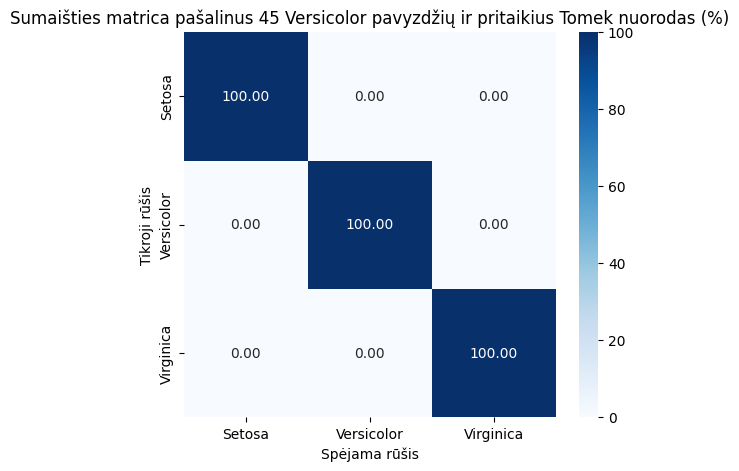

In [18]:
# Pritaikomos Tomek nuorodos su duomenų rinkiniu

from imblearn.under_sampling import TomekLinks

iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df["Species"] = iris.target

species_names = {0: "Setosa", 1: "Versicolor", 2: "Virginica"}
df["Species"] = df["Species"].map(species_names)

setosa_indices = df[df["Species"] == "Setosa"].index[:50]
versicolor_indices = df[df["Species"] == "Versicolor"].index[:5] 
virginica_indices = df[df["Species"] == "Virginica"].index[:50]

imbalanced_df = df.loc[setosa_indices.union(versicolor_indices).union(virginica_indices)].reset_index(drop=True)

X_imbalanced = imbalanced_df.drop(columns=["Species"])
y_imbalanced = imbalanced_df["Species"]

encoder = LabelEncoder()
y_imbalanced_encoded = encoder.fit_transform(y_imbalanced)

X_train_imbalanced, X_test_imbalanced, y_train_imbalanced, y_test_imbalanced = train_test_split(
    X_imbalanced, y_imbalanced_encoded, test_size=0.2, random_state=42, stratify=y_imbalanced_encoded
)

tomek = TomekLinks()
X_train_tomek, y_train_tomek = tomek.fit_resample(X_train_imbalanced_scaled, y_train_imbalanced)

mlp_tomek = MLPClassifier(hidden_layer_sizes=(10, 10), max_iter=1000, random_state=40)
mlp_tomek.fit(X_train_tomek, y_train_tomek)

y_pred_tomek = mlp_tomek.predict(X_test_imbalanced_scaled)

conf_matrix_tomek = confusion_matrix(y_test_imbalanced, y_pred_tomek)

conf_matrix_tomek_percent = conf_matrix_tomek.astype('float') / conf_matrix_tomek.sum(axis=1)[:, np.newaxis] * 100

plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix_tomek_percent, annot=True, fmt=".2f", cmap="Blues", xticklabels=encoder.classes_, yticklabels=encoder.classes_)
plt.xlabel("Spėjama rūšis")
plt.ylabel("Tikroji rūšis")
plt.title("Sumaišties matrica pašalinus 45 Versicolor pavyzdžių ir pritaikius Tomek nuorodas (%)")
plt.show()


/Users/augustestriogaite/Downloads/Class_imbalance_MLP-main/.venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


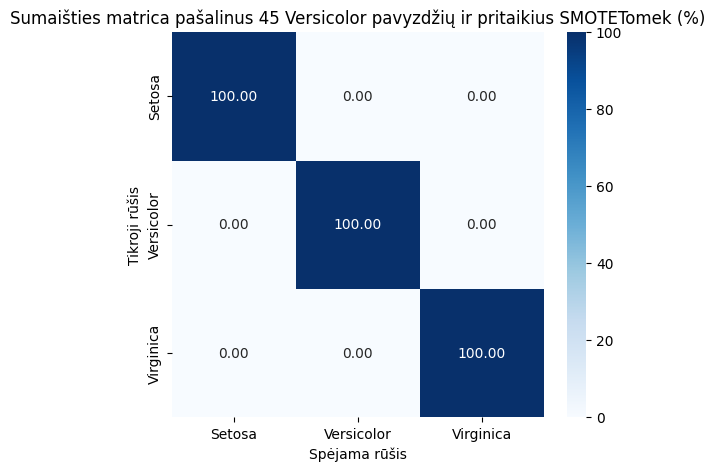

In [19]:
# Pritaikomas SMOTE ir Tomek nuorodų metodas su duomenų rinkiniu

from imblearn.combine import SMOTETomek

custom_smote = SMOTE(k_neighbors=2, random_state=42)

smotetomek = SMOTETomek(smote=custom_smote, random_state=42)
X_train_smotetomek, y_train_smotetomek = smotetomek.fit_resample(X_train_imbalanced_scaled, y_train_imbalanced)

mlp_smotetomek = MLPClassifier(hidden_layer_sizes=(10, 10), max_iter=1000, random_state=900)
mlp_smotetomek.fit(X_train_smotetomek, y_train_smotetomek)

y_pred_smotetomek = mlp_smotetomek.predict(X_test_imbalanced_scaled)

conf_matrix_smotetomek = confusion_matrix(y_test_imbalanced, y_pred_smotetomek)

conf_matrix_smotetomek_percent = conf_matrix_smotetomek.astype('float') / conf_matrix_smotetomek.sum(axis=1)[:, np.newaxis] * 100

plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix_smotetomek_percent, annot=True, fmt=".2f", cmap="Blues", xticklabels=encoder.classes_, yticklabels=encoder.classes_)
plt.xlabel("Spėjama rūšis")
plt.ylabel("Tikroji rūšis")
plt.title("Sumaišties matrica pašalinus 45 Versicolor pavyzdžių ir pritaikius SMOTETomek (%)")
plt.show()


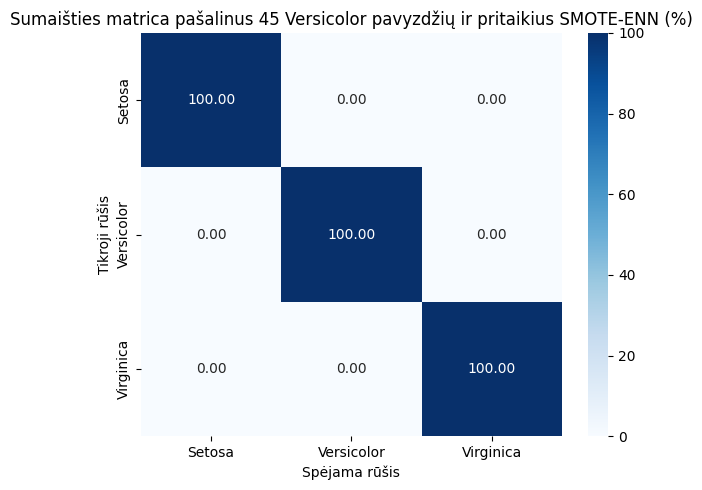

In [20]:
# Pritaikomas SMOTE -ENN su duomenų rinkiniu
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.datasets import load_iris
from imblearn.combine import SMOTEENN

iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df["Species"] = iris.target

species_names = {0: "Setosa", 1: "Versicolor", 2: "Virginica"}
df["Species"] = df["Species"].map(species_names)

setosa_indices = df[df["Species"] == "Setosa"].index[:50]
versicolor_indices = df[df["Species"] == "Versicolor"].index[:6] 
virginica_indices = df[df["Species"] == "Virginica"].index[:50]

imbalanced_df = df.loc[setosa_indices.union(versicolor_indices).union(virginica_indices)].reset_index(drop=True)

X_imbalanced = imbalanced_df.drop(columns=["Species"])
y_imbalanced = imbalanced_df["Species"]

encoder = LabelEncoder()
y_imbalanced_encoded = encoder.fit_transform(y_imbalanced)

X_train_imbalanced, X_test_imbalanced, y_train_imbalanced, y_test_imbalanced = train_test_split(
    X_imbalanced, y_imbalanced_encoded, test_size=0.2, random_state=42, stratify=y_imbalanced_encoded
)
scaler = StandardScaler()
X_train_imbalanced_scaled = scaler.fit_transform(X_train_imbalanced)
X_test_imbalanced_scaled = scaler.transform(X_test_imbalanced)

custom_smote = SMOTE(k_neighbors=2, random_state=466)

smote_enn = SMOTEENN(smote=custom_smote, random_state=3)
X_train_sme, y_train_sme = smote_enn.fit_resample(X_train_imbalanced_scaled, y_train_imbalanced)

mlp_sme = MLPClassifier(hidden_layer_sizes=(10, 10), max_iter=1000, random_state=70)
mlp_sme.fit(X_train_sme, y_train_sme)

y_pred_sme = mlp_sme.predict(X_test_imbalanced_scaled)

conf_matrix_sme = confusion_matrix(y_test_imbalanced, y_pred_sme)
conf_matrix_sme_percent = conf_matrix_sme.astype('float') / conf_matrix_sme.sum(axis=1)[:, np.newaxis] * 100

plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix_sme_percent, annot=True, fmt=".2f", cmap="Blues",
            xticklabels=encoder.classes_, yticklabels=encoder.classes_)
plt.xlabel("Spėjama rūšis")
plt.ylabel("Tikroji rūšis")
plt.title("Sumaišties matrica pašalinus 45 Versicolor pavyzdžių ir pritaikius SMOTE-ENN (%)")
plt.tight_layout()
plt.show()

unique, counts = np.unique(y_test_imbalanced, return_counts=True)
species_counts = dict(zip(encoder.classes_, counts))


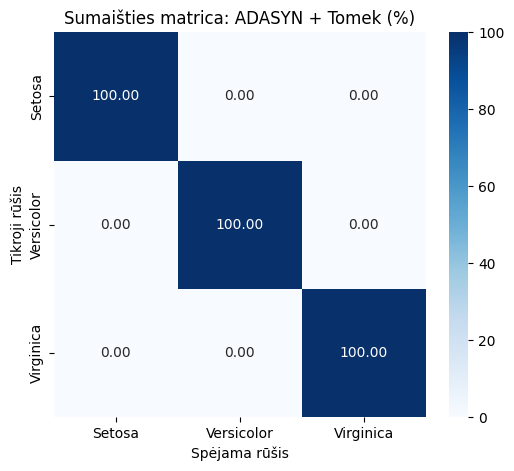

In [21]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix
from imblearn.over_sampling import ADASYN
from imblearn.under_sampling import TomekLinks
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

# 1. Įkeliami duomenys
iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df["Species"] = iris.target
species_names = {0: "Setosa", 1: "Versicolor", 2: "Virginica"}
df["Species"] = df["Species"].map(species_names)

# 2. Sukuriama dirbtinė disbalanso situacija
setosa_indices = df[df["Species"] == "Setosa"].index[:50]
versicolor_indices = df[df["Species"] == "Versicolor"].index[:4]
virginica_indices = df[df["Species"] == "Virginica"].index[:50]
imbalanced_df = df.loc[setosa_indices.union(versicolor_indices).union(virginica_indices)].reset_index(drop=True)

X = imbalanced_df.drop(columns=["Species"])
y = imbalanced_df["Species"]

encoder = LabelEncoder()
y_encoded = encoder.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(
    X, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded
)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

adasyn = ADASYN(n_neighbors=2, random_state=42)
X_ada, y_ada = adasyn.fit_resample(X_train_scaled, y_train)

tomek = TomekLinks()
X_resampled, y_resampled = tomek.fit_resample(X_ada, y_ada)

mlp = MLPClassifier(hidden_layer_sizes=(10, 10), max_iter=1000, random_state=40)
mlp.fit(X_resampled, y_resampled)

y_pred = mlp.predict(X_test_scaled)
conf_matrix = confusion_matrix(y_test, y_pred)
conf_matrix_percent = conf_matrix.astype('float') / conf_matrix.sum(axis=1)[:, np.newaxis] * 100

plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix_percent, annot=True, fmt=".2f", cmap="Blues",
            xticklabels=encoder.classes_, yticklabels=encoder.classes_)
plt.xlabel("Spėjama rūšis")
plt.ylabel("Tikroji rūšis")
plt.title("Sumaišties matrica: ADASYN + Tomek (%)")
plt.show()


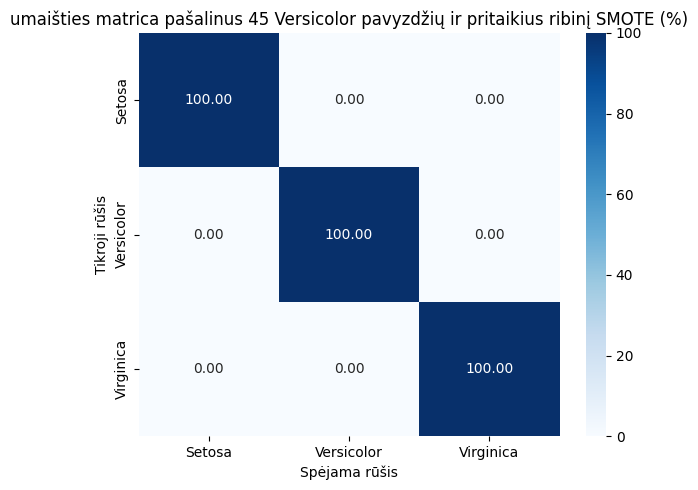

In [22]:
# Pritaikomas Ribinis SMOTE su duomenų rinkiniu

from imblearn.over_sampling import BorderlineSMOTE

iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df["Species"] = iris.target
species_names = {0: "Setosa", 1: "Versicolor", 2: "Virginica"}
df["Species"] = df["Species"].map(species_names)

setosa_indices = df[df["Species"] == "Setosa"].index[:50]
versicolor_indices = df[df["Species"] == "Versicolor"].index[:4]
virginica_indices = df[df["Species"] == "Virginica"].index[:50]
imbalanced_df = df.loc[setosa_indices.union(versicolor_indices).union(virginica_indices)].reset_index(drop=True)

X = imbalanced_df.drop(columns=["Species"])
y = imbalanced_df["Species"]

encoder = LabelEncoder()
y_encoded = encoder.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(
    X, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded
)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

borderline_smote = BorderlineSMOTE(k_neighbors=2, random_state=42)
X_train_bsm, y_train_bsm = borderline_smote.fit_resample(X_train_imbalanced_scaled, y_train_imbalanced)

mlp_bsm = MLPClassifier(hidden_layer_sizes=(10, 10), max_iter=1000, random_state=8)
mlp_bsm.fit(X_train_bsm, y_train_bsm)

y_pred_bsm = mlp_bsm.predict(X_test_imbalanced_scaled)

conf_matrix_bsm = confusion_matrix(y_test_imbalanced, y_pred_bsm)
conf_matrix_bsm_percent = conf_matrix_bsm.astype('float') / conf_matrix_bsm.sum(axis=1)[:, np.newaxis] * 100

plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix_bsm_percent, annot=True, fmt=".2f", cmap="Blues",
            xticklabels=encoder.classes_, yticklabels=encoder.classes_)
plt.xlabel("Spėjama rūšis")
plt.ylabel("Tikroji rūšis")
plt.title("umaišties matrica pašalinus 45 Versicolor pavyzdžių ir pritaikius ribinį SMOTE (%)")
plt.tight_layout()
plt.show()

unique, counts = np.unique(y_test_imbalanced, return_counts=True)
species_counts = dict(zip(encoder.classes_, counts))


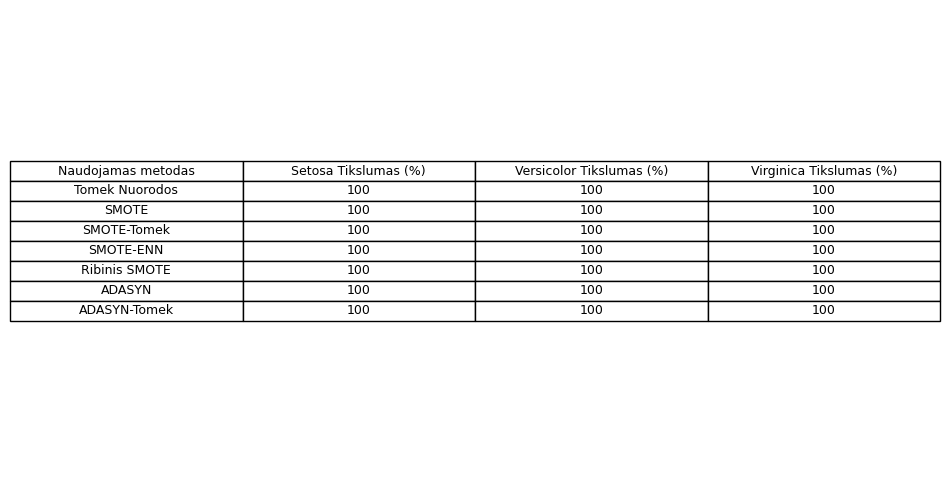

In [23]:
# Gauti rezultatai sukeliami į lentelę

resampling_methods_lt = ["Tomek Nuorodos", "SMOTE", "SMOTE-Tomek", "SMOTE-ENN", "Ribinis SMOTE", "ADASYN", "ADASYN-Tomek"]

setosa_accuracy_45 = [100] * len(resampling_methods_lt)  
versicolor_accuracy_45 = [100] * len(resampling_methods_lt) 
virginica_accuracy_45 = [100] * len(resampling_methods_lt)  

summary_df_lt = pd.DataFrame({
    "Naudojamas metodas": resampling_methods_lt,
    "Setosa Tikslumas (%)": setosa_accuracy_45,
    "Versicolor Tikslumas (%)": versicolor_accuracy_45,
    "Virginica Tikslumas (%)": virginica_accuracy_45,
})

fig, ax = plt.subplots(figsize=(12, 6))  
ax.axis("tight")
ax.axis("off")

table = ax.table(cellText=summary_df_lt.values, colLabels=summary_df_lt.columns, cellLoc="center", loc="center")

table.auto_set_font_size(False)
table.set_fontsize(9)  
table.scale(1, 1.2) 
